I did a lot of data analysis at C04. Now I am ready to print out the figures.

# 1.0 Load related data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import importlib
import loader
importlib.reload(loader)
from loader import load_C05
df=load_C05()

In [3]:
df

,fns,arr_clns,colors,nms,Ts,nano,sz,pxl20nm,cntrs,resol,isb,k123,phase
0,2HTaSe2_bad_78K097,"[[1.0103092144283519e-13, -3.5913526062327836e...",#9467bd,78K(1),78,160,2048,256,"[1024, 1024]",1.0,0.0,"[[114.0, 523.0], [-530.0, -177.0], [426.0, -34...","[[[-2.0996356884472185, -2.068621200858523, -2..."
5,110K_highres,"[[2.5767310122245523e-13, 4.0635659008804856e-...",#1f77b4,110K(2),110,40,1024,512,NaN,NaN,NaN,"[[26.0, 138.0], [-142.0, -47.0], [116.0, -91.0]]","[[[5.389773847253473, 5.388461139619211, 5.385..."
3,2HTaSe2_ao_115K037,"[[5.857832103672808e-13, 2.382601548993847e-12...",#289E28,115K,115,40,1024,512,"[512, 512]",2.0,3.0,"[[31.0, 142.0], [-149.0, -48.0], [118.0, -94.0]]","[[[-5.095307753740863, -5.136761187831822, -5...."
1,2HTaSe2_ap_118K002,"[[-1.5468118784470648e-12, 1.358354867116372e-...",#1f77b4,118K,118,40,512,256,"[256, 256]",1.0,4.0,"[[18.0, 142.0], [-145.0, -48.0], [126.0, -94.0]]","[[[-9.837244096340234, -9.792643644973875, -9...."


# 2.0 Fig2 phasemap

In [4]:
import imagingPhase.get_phimap as gpm

ua = np.array([-1, 1])*np.pi
dfphase = pd.DataFrame({
'arrfcn':[lambda x:x,gpm.wrap_phase,lambda x: gpm.wrap_phase(3*x)/3],
'cmap':['jet','twilight_shifted','RdBu'],
'clim':[ua*3,ua*(1),ua*(1/3)],
'phaseStr':['monotonic','circular','circular(x3)'],
'ticks':[[-np.pi*3, -np.pi*(2/3), 0, np.pi*(2/3), np.pi*3],
    [-np.pi, -np.pi*(2/3), 0, np.pi*(2/3), np.pi],
    [ -np.pi*(1/3), 0, np.pi*(1/3)]],
'tick_labels':[[r"$-3\pi$", r"$-\frac{2}{3}\pi$" ,"", r"$\frac{2}{3}\pi$" ,r"$3\pi$"],
[r"$-\pi$", r"$-\frac{2}{3}\pi$" ,r"$0$", r"$\frac{2}{3}\pi$" ,r"$\pi$"],
[r"$-\frac{1}{3}\pi$" ,r"$0$", r"$\frac{1}{3}\pi$" ]]
})

imagingPhase package loaded


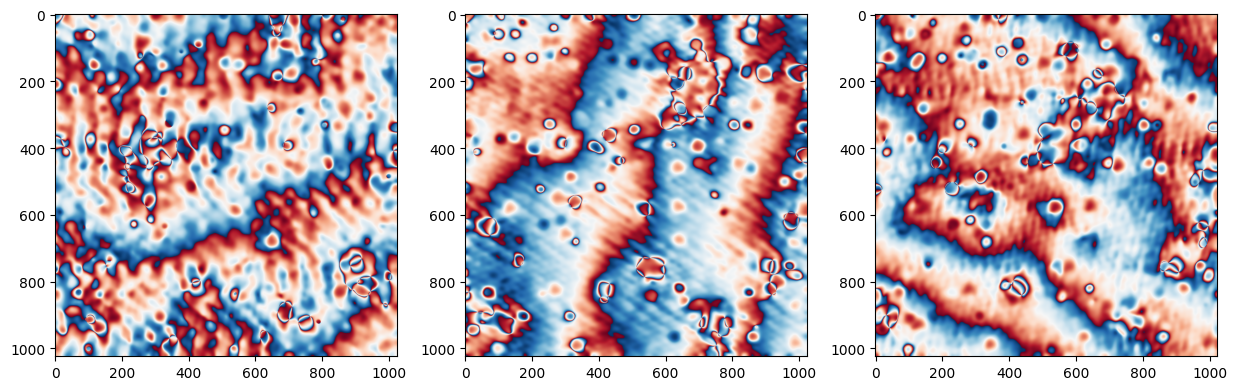

In [5]:
idt = 1
iwrap = 2
dfphaseNow = dfphase.iloc[iwrap]
fig,axs = plt.subplots(1,3,figsize=(15,5))
for ik in range(3):
    plt.sca(axs[ik])    
    dt = df['phase'].iloc[idt][ik]
    if ik == 0:
        dt = dt - .5
    dt_wrap = dfphaseNow['arrfcn'](dt)
    plt.imshow(dt_wrap,cmap=dfphaseNow['cmap'],clim=dfphaseNow['clim'])
plt.savefig('C05_phase_of_k1k2k3.svg', dpi=300, bbox_inches='tight', pad_inches=0)    

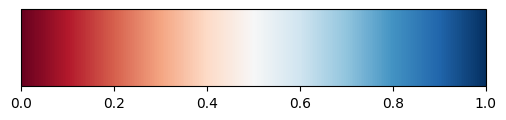

In [19]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.colorbar(mpl.cm.ScalarMappable(cmap='RdBu'), cax=ax, orientation='horizontal')
plt.show()
fig.savefig('C05_RdBu_colorbar.svg', format='svg')

# 3.0 Fig3 images

In [6]:
from useful import auto199
a = np.array
xylims = np.array([
    [a([0,64])+920,a([64,0])+920],
    [a([0,128])+100,a([128,0])],
    [a([0,128])+410,a([128,0])+100],
    [a([0,64])+200,a([64,0])+130]
])
xylims.shape

(4, 2, 2)

d:\github\2H_TaSe2_Tc_STM\2Hvenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


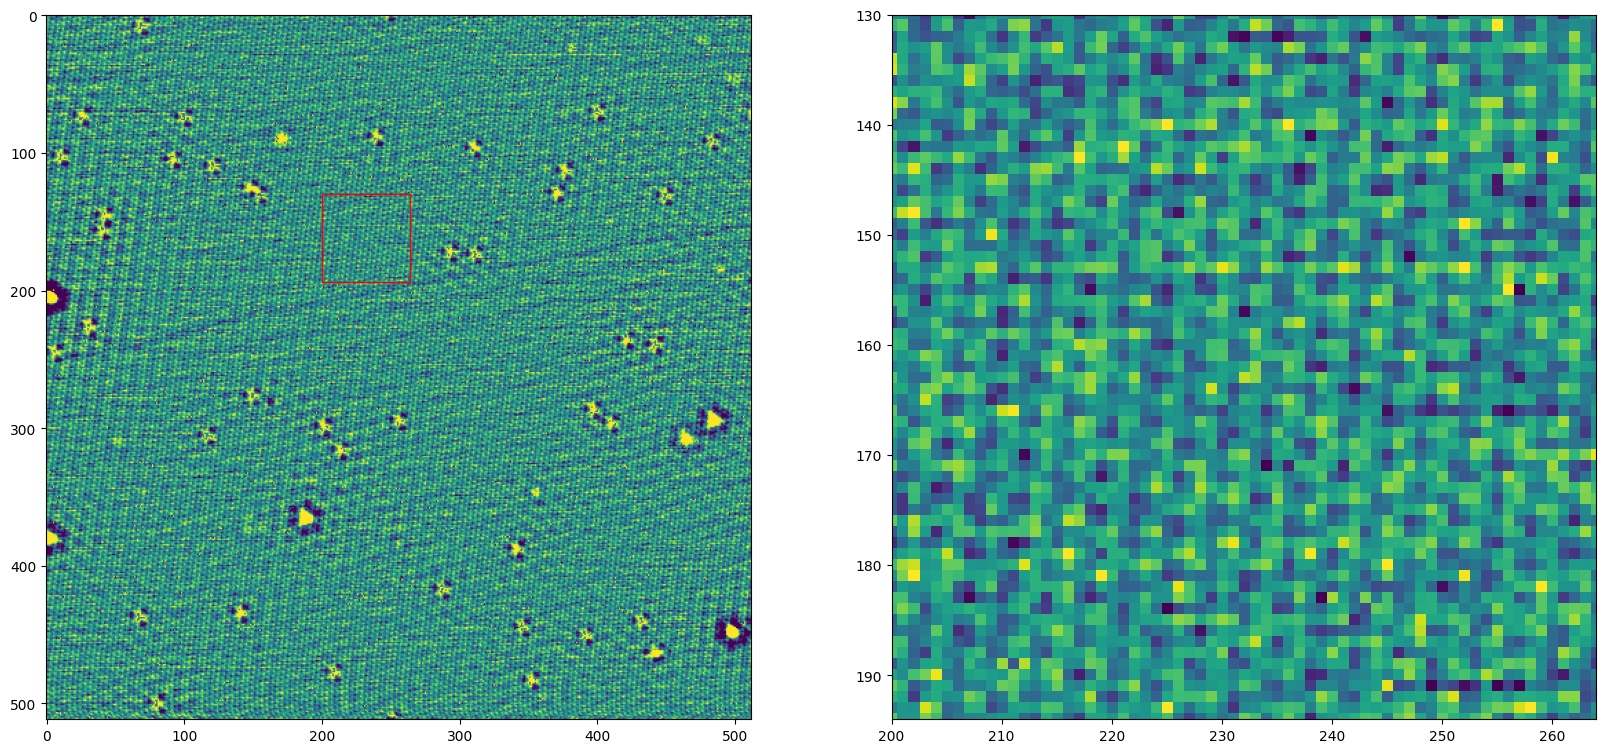

In [7]:
idx = 3
xlim = xylims[idx,0,:]
ylim = xylims[idx,1,:]

topo = df['arr_clns'].iloc[idx]
fig, axs = plt.subplots(1,2, figsize=(20,10))
axs[0].imshow(topo)
import matplotlib.patches as patches
rect = patches.Rectangle((xlim[0], ylim[0]), xlim[1]-xlim[0], ylim[1]-ylim[0], linewidth=1, edgecolor='r', facecolor='none')
axs[0].add_patch(rect)

plt.sca(axs[0])
auto199()
plt.sca(axs[1])
axs[1].imshow(topo)
axs[1].set_xlim(xlim)
axs[1].set_ylim(ylim)
auto199()
plt.show()

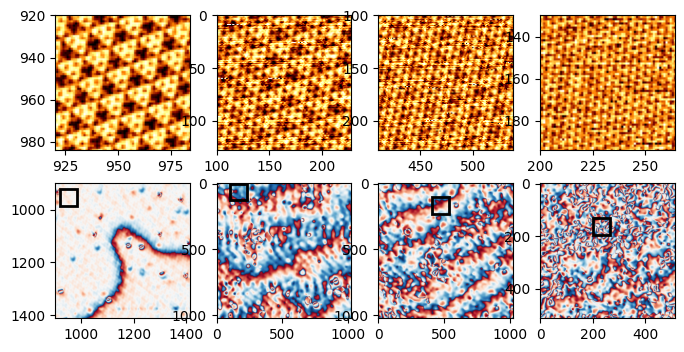

In [8]:
msb,nsb = 2,4
fig,axs = plt.subplots(msb,nsb,figsize=(8,4))
iwrap = 2
dfphaseNow = dfphase.iloc[iwrap]    
ik = 0
for jsb in range(nsb):
    idt = jsb
    dt = df['phase'].iloc[idt][ik]
    dt_wrap = dfphaseNow['arrfcn'](dt)
    axs[1,jsb].imshow(dt_wrap,cmap=dfphaseNow['cmap'],clim=dfphaseNow['clim'])
    img = df['arr_clns'].iloc[idt]        
    axs[0,jsb].imshow(img,cmap='afmhot')
    xlim = xylims[idt,0,:]
    ylim = xylims[idt,1,:]
    rect = patches.Rectangle((xlim[0], ylim[0]), xlim[1]-xlim[0], ylim[1]-ylim[0], linewidth=2, edgecolor='k', facecolor='none')
    axs[1,jsb].add_patch(rect)
    axs[0,jsb].set_xlim(xlim)
    axs[0,jsb].set_ylim(ylim)
    plt.sca(axs[0,jsb])
    auto199()
axs[1,0]    
xlim = np.array([0,512])+900
ylim = np.array([512,0])+900
jsb = 0
axs[1,jsb].set_xlim(xlim)
axs[1,jsb].set_ylim(ylim)
plt.savefig('C05_Fig3_phasemap.svg', format='svg')


# 4.0 Fig3 plots


In [9]:
import imagingPhase.ffts as imfft
def get_fft_prfl(arr_cln,k123):
    scl = 1.2
    atomPos = 1000      
    len_interp = int(atomPos*scl)+1#1201
    fft2abs = imfft.get_magnitude_spectrum(arr_cln)
    fft_pfls = []
    sz = arr_cln.shape
    p1 = np.array([sz[0]//2,sz[1]//2])
    for of3 in range(3):              
        p2 = k123[of3]*scl + p1
        fft_pfl = imfft.get_line_profile(fft2abs, p1, p2, len_interp)        
        fft_pfls.append(fft_pfl)
    return fft_pfls

def get_amp_shift(fft_pfl):
    amp_atom = fft_pfl[1000]
    start, end = 300, 360
    peak_index_relative = np.argmax(fft_pfl[start:end])
    peak_index_global = start + peak_index_relative
    amp_cdw = fft_pfl[peak_index_global]
    amp = amp_cdw/amp_atom
    shift = peak_index_global/1000
    return amp,shift

def circular_mean(phi):
    phi = phi.flatten()
    C = np.cos(tht).sum()
    S = np.sin(tht).sum()
    R  =np.sqrt(C**2+S**2)/len(tht)    
    THT = np.arctan2(S,C)
    return R,THT
# def get_lockin_degree(phi_field):
#     phi_field = phi_field.flatten()
    

In [10]:
T = np.array([78,110,115,118])


In [11]:
fft_pflss = []
amp_shifts = []
for idx in range(4):
    arr_cln = df['arr_clns'].iloc[idx]
    k123 = df['k123'].iloc[idx]
    fft_pfls = get_fft_prfl(arr_cln,k123)
    amp_shift = list(map(get_amp_shift,fft_pfls))
    fft_pflss.append(fft_pfls)
    amp_shifts.append(amp_shift)    

In [12]:
dfphaseNow = dfphase.iloc[2]
lockss = np.zeros((4,3))
vss = np.zeros((4,3,2))
for idx in range(4):
    for ik in range(3):
        dt = df['phase'].iloc[idx][ik]
        x_grad,y_grad = np.gradient(dt)
        v = np.array([x_grad.mean(),y_grad.mean()])
        print(v)
        vss[idx][ik] = v
        dt_wrap =dfphaseNow['arrfcn'](dt)
        tht = dt_wrap*3
        tht = tht.flatten()
        R,THT = circular_mean(tht)
        lockss[idx][ik] = R
        print(idx,ik,R)


[0.00202021 0.00048361]
0 0 0.8336444579835446
[-0.00035967 -0.00287637]
0 1 0.8155502468543115
[-0.0025666   0.00245202]
0 2 0.8037893035997562
[0.00455479 0.00144226]
1 0 0.0991242465151691
[-0.00165362 -0.00456952]
1 1 0.09557719248207609
[-0.00358768  0.00419557]
1 2 0.1370994433639407
[0.00819072 0.00298869]
2 0 0.07214500125471689
[-0.00221111 -0.00567665]
2 1 0.13040378060951055
[-0.00628194  0.00300989]
2 2 0.0980358061357574
[0.01970408 0.01301726]
3 0 0.05889491535128009
[-0.00571781 -0.01985063]
3 1 0.1044892627786825
[-0.01246872  0.01489298]
3 2 0.06356697377352312


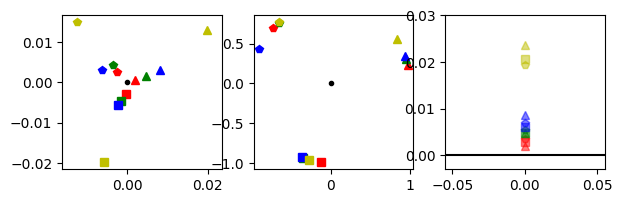

In [14]:
fig,axs = plt.subplots(1,3,figsize=(7,2))
c = ["r","g","b","y"]
mk = ['^','s','p']
for idx in range(4):
    for ik in range(3):
        v = vss[idx,ik,:]
        v_amp = np.sqrt(v[0]**2 + v[1]**2)
        axs[0].plot(v[0],v[1],color=c[idx],marker=mk[ik])
        axs[1].plot(v[0]/v_amp,v[1]/v_amp,color=c[idx],marker=mk[ik])
        axs[2].plot(v_amp,color=c[idx],marker=mk[ik],alpha=0.5)
axs[0].plot(0,0,'.',color='k')        
axs[1].plot(0,0,'.',color='k')        
axs[0].axis('equal')
axs[1].axis('equal')
axs[2].set_ylim([-0.003,0.03])        
axs[2].axhline(y=0,color='k')

236.30472235710747
169.33884410435152
138.2890362744133
51.37154453036082
50.50642049219352
44.460392689842095
28.149831653465647
40.28790623704922
35.23462999388581
20.785936955644267
23.762263628105874
25.272247329224683


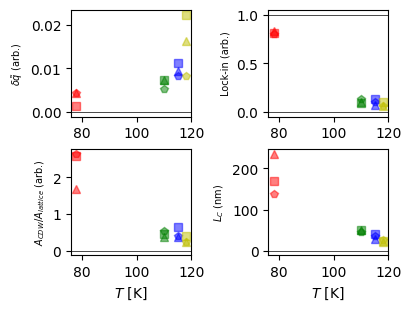

In [25]:
c = ["r","g","b","y"]
mk = ['^','s','p']
fig,axs = plt.subplots(2,2,figsize=(4,3),constrained_layout=True)
iinfo = 0
nm_info = [r'$\delta \tilde{q}$ (arb.)' ,'Lock-in (arb.)','$A_{CDW}/A_{lattice}$ (arb.)','$L_C$ (nm)']
for isb in range(2):
    for jsb in range(2):
        plt.sca(axs[isb,jsb])                
        plt.ylabel(nm_info[iinfo], fontsize=7)
        iinfo += 1
for idx in range(4):
    for ik in range(3):
        v = vss[idx,ik,:]
        lock = lockss[idx][ik]
        v_amp = np.sqrt(v[0]**2 + v[1]**2)
        amp_shift = amp_shifts[idx][ik]
        l_measure =df['nano'].iloc[idx]
        N_tot = df['sz'].iloc[idx]
        l_return = (2*np.pi*l_measure)/(v_amp*N_tot)
        print(l_return)
        # print(T[idx],1/v_amp)
        axs[0,0].plot(T[idx],1/3-amp_shift[1],color=c[idx],marker=mk[ik],alpha=0.5)
        axs[1,0].plot(T[idx],amp_shift[0],color=c[idx],marker=mk[ik],alpha=0.5)
        axs[0,1].plot(T[idx],lock,color=c[idx],marker=mk[ik],alpha=0.5)
        axs[1,1].plot(T[idx],l_return,color=c[idx],marker=mk[ik],alpha=0.5)

        
axs[0,0].axhline(y=0,color='k',linewidth=0.5)
axs[0,1].axhline(y=0,color='k',linewidth=0.5)        
axs[0,1].axhline(y=1,color='k',linewidth=0.5)        
axs[1,0].axhline(y=0,color='k',linewidth=0.5)        
# axs[1,0].axhline(y=1,color='k',linewidth=0.5)        
axs[1,1].axhline(y=0,color='k',linewidth=0.5)      
axs[1,0].set_xlabel(r'$T $ [K]')
axs[1,1].set_xlabel(r'$T $ [K]')
plt.savefig('C05_Fig3_statitics.svg')


236.30472235710747
169.33884410435152
138.2890362744133
51.37154453036082
50.50642049219352
44.460392689842095
28.149831653465647
40.28790623704922
35.23462999388581
20.785936955644267
23.762263628105874
25.272247329224683


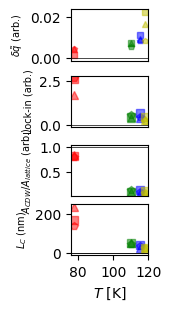

In [ ]:
markersize=4
c = ["r","g","b","y"]
mk = ['^','s','p']
msb = 4
nsb = 1
fig,axs = plt.subplots(msb,nsb,figsize=(1.6,3),constrained_layout=True)
iinfo = 0
nm_info = [r'$\delta \tilde{q}$ (arb.)' ,'Lock-in (arb.)','$A_{CDW}/A_{lattice}$ (arb.)','$L_C$ (nm)']
for isb in range(msb):
    for jsb in range(nsb):
        plt.sca(axs[isb])                
        plt.ylabel(nm_info[iinfo], fontsize=7)
        if isb == 3:
            pass
        else:
            plt.xticks([])
        iinfo += 1
for idx in range(4):
    for ik in range(3):
        v = vss[idx,ik,:]
        lock = lockss[idx][ik]
        v_amp = np.sqrt(v[0]**2 + v[1]**2)
        amp_shift = amp_shifts[idx][ik]
        l_measure =df['nano'].iloc[idx]
        N_tot = df['sz'].iloc[idx]
        l_return = (2*np.pi*l_measure)/(v_amp*N_tot)
        print(l_return)
        # print(T[idx],1/v_amp)
        axs[0].plot(T[idx], 1/3 - amp_shift[1], color=c[idx], marker=mk[ik], alpha=0.5, markersize=markersize)
        axs[1].plot(T[idx],amp_shift[0],color=c[idx],marker=mk[ik],alpha=0.5,markersize=markersize)
        axs[2].plot(T[idx],lock,color=c[idx],marker=mk[ik],alpha=0.5,markersize=markersize)
        axs[3].plot(T[idx],l_return,color=c[idx],marker=mk[ik],alpha=0.5,markersize=markersize)

        
axs[0].axhline(y=0,color='k',linewidth=0.5)
axs[1].axhline(y=0,color='k',linewidth=0.5)        
axs[2].axhline(y=1,color='k',linewidth=0.5)        
axs[3].axhline(y=0,color='k',linewidth=0.5)        
# axs[1,0].axhline(y=1,color='k',linewidth=0.5)        
axs[3].axhline(y=0,color='k',linewidth=0.5)      
axs[3].set_xlabel(r'$T $ [K]')
# axs[1].set_xlabel(r'$T $ [K]')

plt.savefig('C05_Fig3_statitics.svg')

# 5.0 Fig4 plot

In [ ]:
fig = plt.figure()

